<div style="text-align: center;">
  <h1><span style="color: blue; font-family: 'Times New Roman';">Flash Card</span>  
  <span style="color: green; font-family: 'Times New Roman';">Study</span>  
  <span style="color: red; font-family: 'Times New Roman';">App</span></h1>
</div>


### Python Package

flashcard_app/
├── flashcard_app/
│   ├── __init__.py        
│   ├── card.py            
│   ├── folder_manager.py  
│   ├── ui.py              
├── app.py                 
└── README.md              


**1. Main Project Directory**

<p>flashcard_app/
</p>
<p></p>This is the root directory containing the entire project. It holds the package directory (<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">flashcard_app/</span>), the main script (<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">app.py</span>), and a documentation file (<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">README.md</span>).

**2. Subdirectory for the Python Package**
</p>
<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">flashcard_app/flashcard_app/</span>
</p>
<p></p>This is the Python package directory where the core functionality resides. It contains:

* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">__init.py__</span>
</p>
<p></p>Marks the directory as a Python package. It's currently empty but can include initialization code if needed in the future.
</p>
* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">__card.py__</span>
</p>
<p></p>Defines core classes for flashcards:

<p><span style="background-color: lightgray; padding: 2px; border-radius: 3px;">Card</span>: Represents a basic card with a <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">question<span>.
  </p>
    <p><span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCard </span>: A subclass of <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">Card</span> that includes an <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">answer</span>.

  </p>
  
 * <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">__folder_manager.py__</span>
</p>
<p></p>Contains the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FolderManager class</span>, which handles operations like:

     * Adding folders.
     * Storing flashcards.
     * Retrieving folder lists.

* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;"><strong>ui.py</strong></span>
</p>
    <p></p>Implements the Tkinter GUI for the app. This module defines the FlashCardApp class, responsible for:

    * Building the user interface.
    * Interacting with the backend (FolderManager).
    * Adding and displaying folders.


**3. Main Script**
</P>

 <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">__app.py__</span>
</p>
This is the entry point of the application. It initializes the GUI (<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCardApp</span>) and starts the Tkinter event loop. Running this script launches the app.

**4. Documentation**
</p>
<span style="background-color: lightgray; padding: 2px; border-radius: 3px;">README.md</span>
</p>
<p></p>A markdown file that documents the project. It typically includes:

* Project description: What the app does.
* Features: Key functionality of the app.
* Setup instructions: How to install and run the project.
* Project structure: A detailed explanation of the file organization.

**Backend Modules**:

* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">card.py</span> for Card and <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCard</span> classes.
* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">folder_manager.py</span> for <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FolderManager</span> class.
  
**Frontend (UI)**:

* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">ui.py</span> will include the FlashCardApp class for a Tkinter GUI.
* It will allow:
      - Adding folders.
      - Viewing the list of folders.
**Entry Point**:

* <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">app.py</span> will demonstrate the partially functional app.

# Fash Card App Study App (Code) #

In [2]:
import tkinter as tk
from tkinter import messagebox

# Base class for Cards
class Card:
    def __init__(self, question):
        if not question:
            raise ValueError("Card question cannot be empty.")
        self.question = question

# Derived class for FlashCards (inherits from Card)
class FlashCard(Card):
    def __init__(self, question, answer):
        super().__init__(question)
        if not answer:
            raise ValueError("Flashcard answer cannot be empty.")
        self.answer = answer

# FolderManager Class for Handling Folders and Flashcards
class FolderManager:
    def __init__(self):
        self.folders = {}

    def add_folder(self, folder_name):
        """Adds a new folder"""
        if folder_name in self.folders:
            raise ValueError("Folder already exists.")
        self.folders[folder_name] = []

    def delete_folder(self, folder_name):
        """Deletes a folder if it exists"""
        if folder_name not in self.folders:
            raise ValueError(f"Folder '{folder_name}' not found.")
        del self.folders[folder_name]

    def add_flashcard_to_folder(self, folder_name, flashcard):
        """Adds a flashcard to the specified folder"""
        if folder_name not in self.folders:
            raise ValueError(f"Folder '{folder_name}' does not exist.")
        self.folders[folder_name].append(flashcard)

    def get_folders(self):
        """Returns the list of folder names"""
        return list(self.folders.keys())

    def get_flashcards_from_folder(self, folder_name):
        """Returns the list of flashcards from the specified folder"""
        return self.folders.get(folder_name, [])

# GUI Application Class
class FlashCardApp:
    def __init__(self, root):
        self.manager = FolderManager()
        self.current_folder = None
        self.root = root
        self.root.title("Flash Card Study App")
        self.theme = "light"  # Default theme
        self.build_interface()

    def toggle_theme(self):
        """Switch between light mode and dark mode."""
        if self.theme == "light":
            self.theme = "dark"
            self.root.configure(bg="#2E2E2E")
            self.update_widgets_dark_mode()
        else:
            self.theme = "light"
            self.root.configure(bg="#FFFFFF")
            self.update_widgets_light_mode()

    def update_widgets_light_mode(self):
        """Update widget colors for Light Mode."""
        self.title_label.config(fg="blue", bg="#FFFFFF")
        self.folder_list.config(bg="#FFFFFF", fg="black", selectbackground="lightblue")
        self.flashcard_list.config(bg="#FFFFFF", fg="black")
        self.progress_label.config(fg="black", bg="#FFFFFF")
        self.folder_list.config(bg="white")
        self.root.config(bg="#FFFFFF")

    def update_widgets_dark_mode(self):
        """Update widget colors for Dark Mode."""
        self.title_label.config(fg="cyan", bg="#2E2E2E")
        self.folder_list.config(bg="#555555", fg="white", selectbackground="darkblue")
        self.flashcard_list.config(bg="#555555", fg="white")
        self.progress_label.config(fg="white", bg="#2E2E2E")
        self.folder_list.config(bg="#444444")
        self.root.config(bg="#2E2E2E")

    def build_interface(self):
        # Title of the Application
        self.title_label = tk.Label(self.root, text="Flash Card Study App", font=("Arial", 24, "bold"))
        self.title_label.pack(pady=10)

        # Toggle Theme Button
        toggle_button = tk.Button(self.root, text="Toggle Dark/Light Mode", command=self.toggle_theme, width=20)
        toggle_button.pack(pady=10)

        # Main Menu Frame
        menu_frame = tk.Frame(self.root)
        menu_frame.pack(pady=10)

        tk.Button(menu_frame, text="Add Folder", command=self.add_folder_dialog, width=15).pack(side=tk.LEFT, padx=5)
        tk.Button(menu_frame, text="Delete Folder", command=self.delete_folder_dialog, width=15).pack(side=tk.LEFT, padx=5)
        tk.Button(menu_frame, text="Add Flashcard", command=self.add_flashcard_dialog, width=15).pack(side=tk.LEFT, padx=5)
        tk.Button(menu_frame, text="Start Study Session", command=self.start_study_session, width=20).pack(side=tk.LEFT, padx=5)

        # Folder Section
        folder_frame = tk.Frame(self.root)
        folder_frame.pack(pady=10)

        tk.Label(folder_frame, text="Folders", font=("Arial", 12, "bold")).pack()
        self.folder_list = tk.Listbox(folder_frame, width=30, height=6, font=("Arial", 10))  # Adjust font for all items
        self.folder_list.pack(pady=5)
        self.folder_list.bind("<<ListboxSelect>>", self.select_folder)

        # Flashcard Section
        flashcard_frame = tk.Frame(self.root)
        flashcard_frame.pack(pady=10)

        tk.Label(flashcard_frame, text="Flashcards", font=("Arial", 12, "bold")).pack()
        self.flashcard_list = tk.Listbox(flashcard_frame, width=50, height=10)
        self.flashcard_list.pack(pady=5)

        # Progress Tracker
        self.progress_label = tk.Label(self.root, text="", font=("Arial", 12))
        self.progress_label.pack(pady=5)

        self.update_folder_list()

    def update_folder_list(self):
        self.folder_list.delete(0, tk.END)
        for folder in self.manager.get_folders():
            # Here we are adding the folder name with bold style
            self.folder_list.insert(tk.END, folder)
        self.update_flashcard_list()

    def update_flashcard_list(self):
        self.flashcard_list.delete(0, tk.END)
        if self.current_folder:
            for card in self.manager.get_flashcards_from_folder(self.current_folder):
                self.flashcard_list.insert(tk.END, card.question)

    def select_folder(self, event):
        selected = self.folder_list.curselection()
        if selected:
            self.current_folder = self.folder_list.get(selected[0])
            self.update_flashcard_list()

    def add_folder_dialog(self):
        dialog = tk.Toplevel(self.root)
        dialog.title("Add Folder")

        tk.Label(dialog, text="Folder Name:").pack(pady=5)
        folder_entry = tk.Entry(dialog, width=40)
        folder_entry.pack(pady=5)

        def save_folder():
            folder_name = folder_entry.get().strip()
            try:
                if folder_name:
                    self.manager.add_folder(folder_name)
                    self.update_folder_list()  # This will refresh the folder list and apply the bold style
                    dialog.destroy()
                else:
                    raise ValueError("Folder name cannot be empty!")
            except ValueError as e:
                messagebox.showerror("Error", str(e))

        tk.Button(dialog, text="Save", command=save_folder).pack(pady=10)

    def delete_folder_dialog(self):
        selected = self.folder_list.curselection()
        if selected:
            folder_name = self.folder_list.get(selected[0])
            try:
                self.manager.delete_folder(folder_name)
                self.update_folder_list()
            except ValueError as e:
                messagebox.showerror("Error", str(e))
        else:
            messagebox.showerror("Error", "No folder selected!")

    def add_flashcard_dialog(self):
        if not self.current_folder:
            messagebox.showerror("Error", "Please select a folder first!")
            return

        dialog = tk.Toplevel(self.root)
        dialog.title(f"Add Flashcard to Folder: {self.current_folder}")

        tk.Label(dialog, text="Question:").pack(pady=5)
        question_entry = tk.Entry(dialog, width=40)
        question_entry.pack(pady=5)

        tk.Label(dialog, text="Answer:").pack(pady=5)
        answer_entry = tk.Entry(dialog, width=40)
        answer_entry.pack(pady=5)

        def save_flashcard():
            question = question_entry.get().strip()
            answer = answer_entry.get().strip()
            try:
                if question and answer:
                    flashcard = FlashCard(question, answer)
                    self.manager.add_flashcard_to_folder(self.current_folder, flashcard)
                    self.update_flashcard_list()
                    dialog.destroy()
                else:
                    raise ValueError("Both question and answer must be provided!")
            except ValueError as e:
                messagebox.showerror("Error", str(e))

        tk.Button(dialog, text="Save", command=save_flashcard).pack(pady=10)

    def start_study_session(self):
        if not self.current_folder:
            messagebox.showerror("Error", "Please select a folder to study!")
            return

        flashcards = self.manager.get_flashcards_from_folder(self.current_folder)

        if not flashcards:
            messagebox.showerror("Error", f"No flashcards in folder '{self.current_folder}'!")
            return

        study_window = tk.Toplevel(self.root)
        study_window.title(f"Study Session: {self.current_folder}")

        current_index = [0]
        score = [0]

        def show_question():
            question_label.config(text=flashcards[current_index[0]].question)
            answer_entry.delete(0, tk.END)
            result_label.config(text="")
            feedback_label.config(text="")

        def check_answer():
            user_answer = answer_entry.get().strip()
            correct_answer = flashcards[current_index[0]].answer
            if user_answer.lower() == correct_answer.lower():
                result_label.config(text="Correct!", fg="green")
                feedback_label.config(text="✅", fg="green", font=("Arial", 24))
                score[0] += 1
            else:
                result_label.config(text=f"Wrong! Correct: {correct_answer}", fg="red")
                feedback_label.config(text="❌", fg="red", font=("Arial", 24))

        def next_card():
            current_index[0] = (current_index[0] + 1) % len(flashcards)
            show_question()

        def end_session():
            messagebox.showinfo("Study Session", f"Session Complete! Score: {score[0]}/{len(flashcards)}")
            study_window.destroy()

        question_label = tk.Label(study_window, text="", font=("Arial", 16), wraplength=300)
        question_label.pack(pady=10)

        answer_entry = tk.Entry(study_window, width=30)
        answer_entry.pack(pady=5)

        button_frame = tk.Frame(study_window)
        button_frame.pack(pady=10)

        tk.Button(button_frame, text="Check Answer", command=check_answer).pack(side=tk.LEFT, padx=5)
        tk.Button(button_frame, text="Next", command=next_card).pack(side=tk.LEFT, padx=5)
        tk.Button(button_frame, text="End Session", command=end_session).pack(side=tk.LEFT, padx=5)

        result_label = tk.Label(study_window, text="", font=("Arial", 12))
        result_label.pack(pady=5)

        feedback_label = tk.Label(study_window, text="", font=("Arial", 24))
        feedback_label.pack(pady=5)

        show_question()

# Main Application
if __name__ == "__main__":
    root = tk.Tk()
    app = FlashCardApp(root)
    root.mainloop()


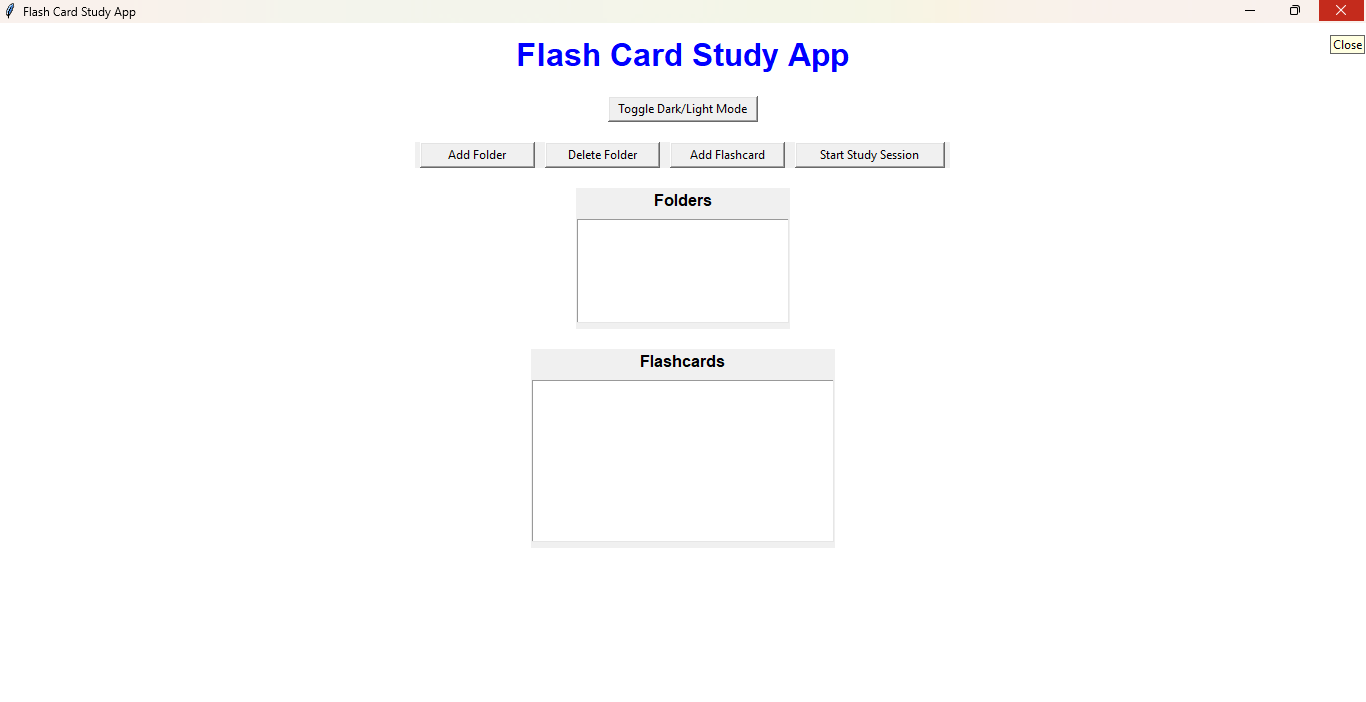

   The **Menu** Frame in the code is part of the Tkinter-based FlashCardApp GUI. It contains several buttons that allow the user to interact with the app's functionality, such as adding folders, deleting folders, adding flashcards, and starting a study session. Let's break down the code that constructs the menu frame and explain its role.
   </p>
   
The Menu Frame serves as the control center of the application. It provides the user with buttons that allow them to manage folders and flashcards and begin a study session. The design is kept simple and intuitive, with each button representing a distinct action.




<div style="text-align: center;">
    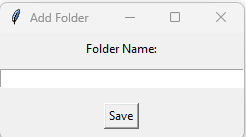
</div>


The **Folder** Section in the code is another key part of the Tkinter-based FlashCardApp GUI. It displays a list of folders the user has created, allowing the user to select a folder to work with (e.g., add flashcards or start a study session).
</p>
The Folder Section serves as the area where the user can view all the folders they have created. The Listbox allows the user to see a list of folder names and select one to interact with further (e.g., adding flashcards or starting a study session).
The <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">select_folder</span> method ensures that when a folder is clicked, it becomes the current folder for further operations.

**How It Works**:

* When the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCardApp,</span> starts, the list of folders is empty. As the user adds folders, they are dynamically displayed in the listbox.
* Selecting a folder will trigger the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">select_folder</span> method, which will then update the Flashcard Section to show the flashcards for that folder.
  
**Interactivity**:
* Clicking a Folder: The user can select a folder from the list, which will trigger the selection event and display the folder's flashcards in the Flashcard Section.
* Dynamic Updates: The folder list and flashcard list are updated whenever a new folder is added, deleted, or when flashcards are added to a folder.
Visual Example:

<div style="text-align: center;">
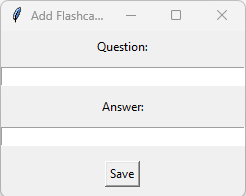
</div>


The **Flashcard Section** in the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCardApp</span> is responsible for displaying the list of flashcards within a selected folder. It allows the user to interact with the flashcards and see their questions. 

<p>The Flashcard Section is where the user can view the questions of flashcards that are in the currently selected folder. When a folder is selected, this section will update to show the list of questions for the flashcards contained within that folder.
</p>
The Flashcard Listbox displays the questions in a scrollable format so that users can easily navigate through multiple flashcards.

**How It Works**:
* Initially, when the app starts, the list is empty. After a user selects a folder, the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">update_flashcard_list</span> method is called to populate this list with the flashcard questions.
* Adding Flashcards: When the user adds a flashcard to a folder using the "Add Flashcard" button, the flashcards for the currently selected folder will be updated in the Listbox to include the new flashcard question.
  
**Dynamic Updates**:
* When the user selects a folder from the Folder Section, the Flashcard Section updates dynamically to show the questions of the flashcards contained in that folder.
* If the user adds or deletes flashcards, the list is updated to reflect the changes, ensuring the UI always displays the current set of flashcards for the selected folder.
  
**Interactivity**:
* Viewing Flashcards: The user can scroll through the list of flashcards and see the questions. However, the flashcards themselves are not editable directly in the Listbox—users can only view the questions.

To add interactivity (such as showing answers or editing flashcards), you would need additional UI elements like buttons or labels that show the answer when the user clicks on a flashcard question.

<div style="text-align: center;">
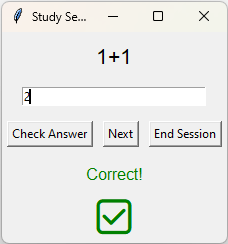

The **Study Session** in the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCardApp</span> is where users can actively review flashcards by answering questions and receiving immediate feedback on their responses. This section simulates a learning or quiz environment where users can test their knowledge, track their score, and move through a set of flashcards interactively.

**How the Study Session Works**:

**1. Starting the Session**:

* When the user clicks on the "Start Study Session" button in the main app window, it opens the study session window.
  
**2. Answering Questions**:

* The user sees the current flashcard’s question and types their answer into the entry field.
* After clicking Check Answer, the app will compare the entered answer with the flashcard’s correct answer.
* If the answer is correct, a green "Correct!" message appears with a checkmark. If it's wrong, a red "Wrong!" message appears with the correct answer and a cross.
  
**3. Next Question**:

* Clicking Next moves to the next flashcard, and the question is updated.
  
**4.Ending the Session**:

* The session ends when the user clicks the End Session button, which shows their score (e.g., "3 out of 5 correct answers") in a pop-up message box.
  
**Visual Layout of Study Session**:
**Initial Question Display**:

* A question appears at the top, followed by an input field for the user to type their answer.
* Below that, there are buttons for "Check Answer", "Next", and "End Session".
* 
**Feedback**:

* When the user checks their answer, immediate feedback is given:
    * Correct answer: "Correct!" in green and a checkmark.
    * Incorrect answer: "Wrong! Correct answer: [Answer]" in red and a cross.
      
**Progress**:

* The user can move through the flashcards by clicking Next or end the session with the End Session button, which displays their score in a popup.

<div style="text-align: center;">
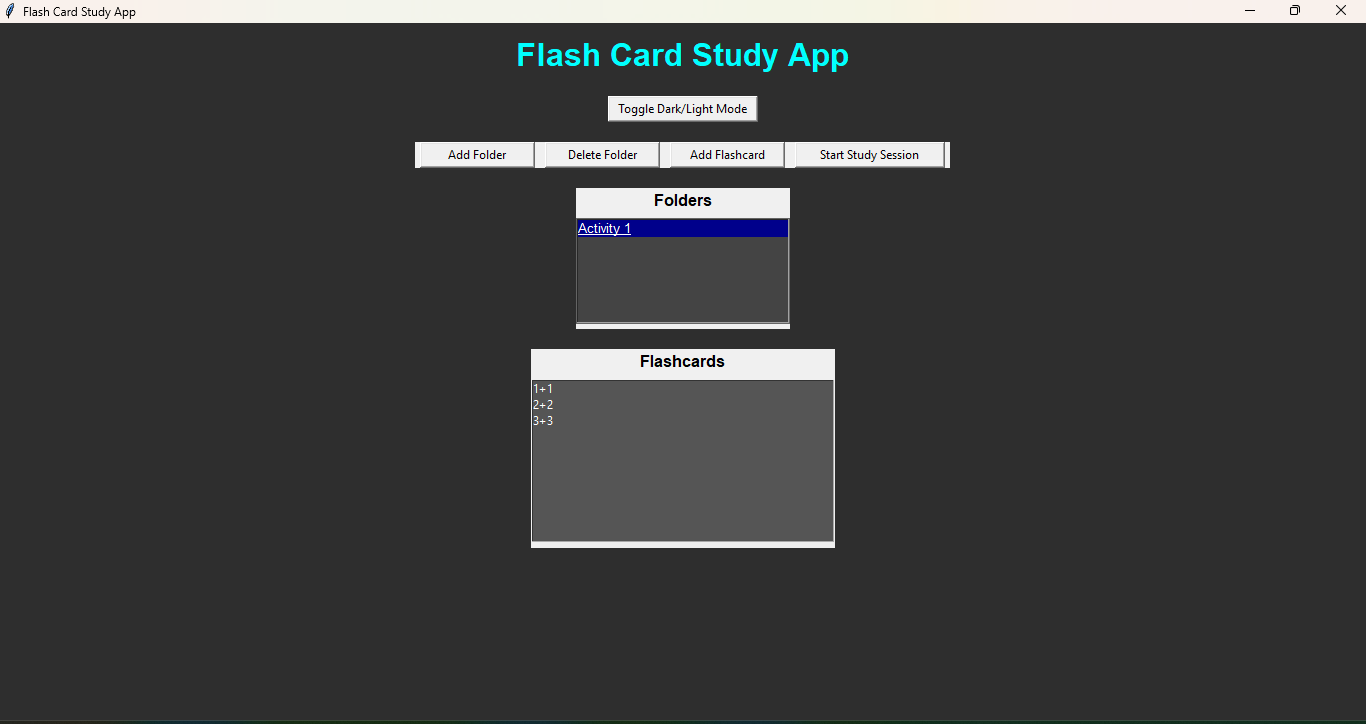

The **Toggle Dark/Light** Mode functionality in the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">FlashCardApp</span> allows users to switch between two visual themes for the application's interface: a light mode (default) and a dark mode. This feature enhances user experience by providing an option to suit different lighting conditions or personal preferences.

**How It Works**:
**1. Initial State**:

* When the application starts, the default theme is light. The background is set to white, and the widgets have light colors.
  
**2. Switching to Dark Mode**:

* When the user clicks the Toggle Dark/Light Mode button, the <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">toggle_theme()</span> method is called.
* The background of the main window <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">(self.root)</span> changes to dark grey, and the widget colors are <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">updated to the dark theme using update_widgets_dark_mode()</span>.
  
**3.Switching to Light Mode**:

* Clicking the toggle button again switches back to light mode.
* The background of the main window changes back to white, and the widget colors are updated using <span style="background-color: lightgray; padding: 2px; border-radius: 3px;">update_widgets_light_mode()</span>.
  
**Benefits of Dark/Light Mode**:
1. User Preference: Users can choose a theme based on their environment or personal comfort.
   * Light Mode: Ideal for well-lit environments.
   * Dark Mode: Reduces eye strain in low-light settings and can save battery on OLED screens.
2. Accessibility: Some users may prefer dark mode for visual comfort or to reduce glare.




***Note: It's clear that the flashcard application is still a work in progress and requires further refinement in terms of study, code, and design to ensure it meets user satisfaction. Keep iterating on the user interface and functionality to enhance the overall experience! You can recommend us some of your ideas for the betterment of the application."***


<div style="text-align: center;">
  <h2>Thank You!!</h2>
</div>
